# 3.  Crypto Assets: Data Preprocessing

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import pandas as pd

#import plotly 
import plotly.plotly 
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

init_notebook_mode(connected=True)

from sklearn.cluster import KMeans, SpectralClustering
from scipy.spatial.distance import cdist
from sklearn import metrics
from utils import *

## 1. Load the data and set workspace

In [2]:
# get the coin pairs file names from the ICO_Data folder 
currencies = !cd ICO_Data/; ls

The raw quotes arrives at random times. 
For different coins there are timeseries of different lenghts and frequencies available. 
The following dataframe gives the overview on some descriptive metrics for each coin.

In [3]:
# read each json file with market data for coin pair and print quick info about the dataset
treshold = 0.1
res = []
for i, fname in enumerate(list(currencies)): 
    df = pd.read_json("ICO_Data/" + fname)
    df2 = get_dataframe(df)
    mask = pd.Series(data = df2.index, index = df2.index).diff(1).dt.total_seconds().pct_change()>treshold
    res.append({"coin": currencies[i].split(".")[0],
                "oldest_quote": str(datetime.fromtimestamp(df["volume_usd"].iloc[0][0]/1000.)), 
                "latest_quote": str(datetime.fromtimestamp(df["volume_usd"].iloc[-1][0]/1000.)),
                "length_of_the_epoch": datetime.fromtimestamp(df["volume_usd"].iloc[-1][0]/1000.) - 
                    datetime.fromtimestamp(df["volume_usd"].iloc[0][0]/1000.),
                "number_of_quotes": len(df),
                "largest_gap": pd.Series(data = df2.index, index = df2.index).diff(1).max(),
                "smallest_gap": pd.Series(data = df2.index, index = df2.index).diff(1).min(),
                "larger then treshhold": len(df2[mask]),
                "larger_then_treshhold_in_percents": len(df2[mask])/len(df2)*100})
df3 = pd.DataFrame(res, columns = ["coin", "number_of_quotes", "oldest_quote", "latest_quote", "length_of_the_epoch", 
                    "largest_gap", "smallest_gap", "larger then treshhold", "larger_then_treshhold_in_percents"])
df3

,coin,number_of_quotes,oldest_quote,latest_quote,length_of_the_epoch,largest_gap,smallest_gap,larger then treshhold,larger_then_treshhold_in_percents
0,bitcoin-cash,2118,2017-07-23 17:29:27,2018-01-16 02:54:12,176 days 09:24:45,0 days 02:42:21,00:35:00,3,0.141643
1,bitcoin-gold,2024,2017-10-23 20:39:25,2018-01-16 02:54:15,84 days 06:14:50,0 days 01:10:01,00:00:00,2,0.098814
2,bitcoin,1708,2013-04-28 19:47:21,2018-01-16 02:54:21,1723 days 07:07:00,2 days 07:55:00,22:54:59,30,1.756440
3,cardano,1276,2017-10-01 21:34:25,2018-01-16 02:54:14,106 days 05:19:49,0 days 02:09:56,01:00:01,1,0.078370
4,dash,1418,2014-02-14 13:44:09,2018-01-16 02:54:01,1431 days 13:09:52,2 days 23:44:56,13:15:00,24,1.692525
5,eos,793,2017-07-01 20:14:14,2018-01-16 02:54:11,198 days 06:39:57,0 days 13:34:12,03:54:59,3,0.378310
6,ethereum-classic,541,2016-07-24 14:44:30,2018-01-16 02:54:07,540 days 12:09:37,1 days 20:54:26,02:00:00,2,0.369686
7,ethereum,892,2015-08-07 15:49:30,2018-01-16 02:54:11,892 days 11:04:41,1 days 20:07:09,02:00:01,5,0.560538
8,icon,1947,2017-10-27 01:19:31,2018-01-16 02:54:15,81 days 01:34:44,0 days 01:20:05,00:00:00,3,0.154083
9,iota,862,2017-06-13 15:30:09,2018-01-16 02:54:10,216 days 11:24:01,0 days 14:38:47,04:59:59,5,0.580046


Lets pick the oldest date common for all coins: 

In [6]:
mask_t_start = df3.oldest_quote.max()
df3[df3["oldest_quote"] == mask_t_start]

,coin,number_of_quotes,oldest_quote,latest_quote,length_of_the_epoch,largest_gap,smallest_gap,larger then treshhold,larger_then_treshhold_in_percents
8,icon,1947,2017-10-27 01:19:31,2018-01-16 02:54:15,81 days 01:34:44,01:20:05,0 days,3,0.154083


and the smallest latest date common for all coins: 

In [7]:
mask_t_end = df3.latest_quote.min()
df3[df3["latest_quote"] == mask_t_end]

,coin,number_of_quotes,oldest_quote,latest_quote,length_of_the_epoch,largest_gap,smallest_gap,larger then treshhold,larger_then_treshhold_in_percents
4,dash,1418,2014-02-14 13:44:09,2018-01-16 02:54:01,1431 days 13:09:52,2 days 23:44:56,13:15:00,24,1.692525
11,litecoin,1710,2013-04-28 19:47:22,2018-01-16 02:54:01,1723 days 07:06:39,2 days 08:45:01,19:15:00,23,1.345029
17,ripple,1608,2013-08-04 19:51:05,2018-01-16 02:54:01,1625 days 07:02:56,1 days 22:04:58,17:30:00,29,1.803483


In [8]:
# check the difference between the smallest latest and latest latest date -> it is 20s 
mask = df3.latest_quote.max()
df3[df3["latest_quote"] == mask]

,coin,number_of_quotes,oldest_quote,latest_quote,length_of_the_epoch,largest_gap,smallest_gap,larger then treshhold,larger_then_treshhold_in_percents
2,bitcoin,1708,2013-04-28 19:47:21,2018-01-16 02:54:21,1723 days 07:07:00,2 days 07:55:00,22:54:59,30,1.75644


### Volume 

In [9]:
res = []
for i, fname in enumerate(list(currencies)): 
    df = pd.read_json("ICO_Data/" + fname)
    df2 = get_dataframe(df)
    res.append({"coin": currencies[i].split(".")[0],
                "oldest_quote": str(datetime.fromtimestamp(df["volume_usd"].iloc[0][0]/1000.)), 
                "latest_quote": str(datetime.fromtimestamp(df["volume_usd"].iloc[-1][0]/1000.)),
                "length_of_the_epoch": datetime.fromtimestamp(df["volume_usd"].iloc[-1][0]/1000.) - 
                    datetime.fromtimestamp(df["volume_usd"].iloc[0][0]/1000.),
                "number_of_quotes": len(df),
                "volume_max": pd.Series(data = df2.volume, index = df2.index).max(),
                "volume_min": pd.Series(data = df2.volume, index = df2.index).min(),
                "volume_median": pd.Series(data = df2.volume, index = df2.index).median(),
                "volume_mean": pd.Series(data = df2.volume, index = df2.index).mean(),})
df3 = pd.DataFrame(res, columns = ["coin", "number_of_quotes", "oldest_quote", "latest_quote", "length_of_the_epoch", 
                                    "volume_max", "volume_min", "volume_median", "volume_mean"])
df3

,coin,number_of_quotes,oldest_quote,latest_quote,length_of_the_epoch,volume_max,volume_min,volume_median,volume_mean
0,bitcoin-cash,2118,2017-07-23 17:29:27,2018-01-16 02:54:12,176 days 09:24:45,12183500000,40740,574765500.0,1.123201e+09
1,bitcoin-gold,2024,2017-10-23 20:39:25,2018-01-16 02:54:15,84 days 06:14:50,1809930000,4123970,123746000.0,1.684915e+08
2,bitcoin,1708,2013-04-28 19:47:21,2018-01-16 02:54:21,1723 days 07:07:00,23430800000,0,40399100.0,6.774715e+08
3,cardano,1276,2017-10-01 21:34:25,2018-01-16 02:54:14,106 days 05:19:49,1087620000,1712180,22630250.0,1.080127e+08
4,dash,1418,2014-02-14 13:44:09,2018-01-16 02:54:01,1431 days 13:09:52,641698000,4277,293139.0,1.887033e+07
5,eos,793,2017-07-01 20:14:14,2018-01-16 02:54:11,198 days 06:39:57,4164420000,3987670,38877500.0,1.717060e+08
6,ethereum-classic,541,2016-07-24 14:44:30,2018-01-16 02:54:07,540 days 12:09:37,1677020000,211101,22194700.0,1.181721e+08
7,ethereum,892,2015-08-07 15:49:30,2018-01-16 02:54:11,892 days 11:04:41,9674000000,90621,19852350.0,4.163852e+08
8,icon,1947,2017-10-27 01:19:31,2018-01-16 02:54:15,81 days 01:34:44,348934000,5510,130727.0,4.661031e+07
9,iota,862,2017-06-13 15:30:09,2018-01-16 02:54:10,216 days 11:24:01,2866720000,2094720,19855900.0,1.186257e+08


## 2. Apply labels

In [10]:
res = []
df_all = pd.DataFrame()
for i, fname in enumerate(list(currencies)): 
    df = pd.read_json("ICO_Data/" + fname)
    df2 = get_dataframe(df)
    df2["coin"] = currencies[i].split(".")[0]
    df_all = df_all.append(df2)

In [11]:
print(df_all.columns)
df_all.head(10)

Index(['market_cap', 'price_usd', 'volume', 'coin'], dtype='object')


,market_cap,price_usd,volume,coin
2017-07-23 17:29:27,0,555.886,40740,bitcoin-cash
2017-07-23 19:29:27,0,556.148,47317,bitcoin-cash
2017-07-23 21:29:38,0,508.121,50111,bitcoin-cash
2017-07-23 23:29:50,0,547.580,55320,bitcoin-cash
2017-07-24 01:29:53,0,411.550,84702,bitcoin-cash
2017-07-24 03:29:53,0,554.098,114058,bitcoin-cash
2017-07-24 05:29:52,0,550.524,115807,bitcoin-cash
2017-07-24 07:29:53,0,546.323,121423,bitcoin-cash
2017-07-24 09:29:59,0,543.385,142412,bitcoin-cash
2017-07-24 11:29:56,0,555.949,142692,bitcoin-cash


In [12]:
df_all = df_all.assign(vol_market_cap_ratio = np.where(df_all["market_cap"]!=0., df_all["volume"].divide(df_all["market_cap"]), np.nan))

In [13]:
df_all = df_all.reset_index()
df_all = df_all.rename(columns={'index': 'timestamp'})

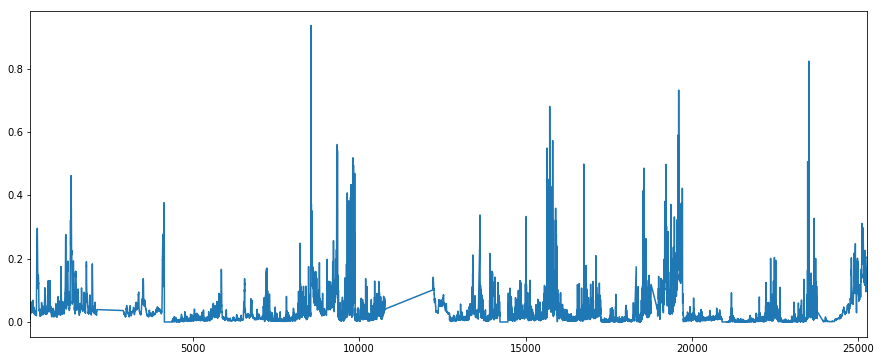

In [14]:
% matplotlib inline
df_all["vol_market_cap_ratio"].dropna().plot(figsize=(15,6))

In [15]:
print(df_all.coin.unique())
# pick the dataframe for a particular coin
df_all[df_all["coin"] == df_all.coin.unique()[3]].head(10)

['bitcoin-cash' 'bitcoin-gold' 'bitcoin' 'cardano' 'dash' 'eos'
 'ethereum-classic' 'ethereum' 'icon' 'iota' 'lisk' 'litecoin' 'monero'
 'nem' 'neo' 'qtum' 'raiblocks' 'ripple' 'stellar' 'tron']


,timestamp,market_cap,price_usd,volume,coin,vol_market_cap_ratio
5850,2017-10-01 21:34:25,0,0.021678,11867200,cardano,NaN
5851,2017-10-01 23:39:25,0,0.018838,36086100,cardano,NaN
5852,2017-10-02 01:39:24,0,0.028122,55855000,cardano,NaN
5853,2017-10-02 03:39:25,0,0.025305,68772500,cardano,NaN
5854,2017-10-02 05:39:36,611236291,0.025204,74631700,cardano,0.122100
5855,2017-10-02 07:39:40,529875547,0.021849,77649600,cardano,0.146543
5856,2017-10-02 09:39:30,495765052,0.020442,82296600,cardano,0.165999
5857,2017-10-02 11:39:38,539877088,0.022261,86003500,cardano,0.159302
5858,2017-10-02 13:39:38,547324889,0.022568,87742500,cardano,0.160312
5859,2017-10-02 15:39:45,573427360,0.023644,91183400,cardano,0.159015


In [16]:
# summary stats for volume / market capitalisation
df_all.groupby("coin")['vol_market_cap_ratio'].describe()

,count,mean,std,min,25%,50%,75%,max
coin,,,,,,,,
bitcoin,1708.0,0.010740,0.012864,0.000000,0.002975,0.006568,0.012655,0.089963
bitcoin-cash,2006.0,0.064225,0.056063,0.008120,0.031450,0.043452,0.072386,0.462038
bitcoin-gold,1232.0,0.046565,0.047699,0.015383,0.025191,0.033231,0.044857,0.376668
cardano,1272.0,0.017157,0.019507,0.002542,0.007366,0.011501,0.019317,0.165999
dash,1418.0,0.018136,0.021497,0.001242,0.005348,0.010257,0.023072,0.248669
eos,787.0,0.088503,0.082291,0.018755,0.043210,0.065846,0.101890,0.935895
ethereum,891.0,0.025077,0.020163,0.002047,0.010320,0.019429,0.033138,0.136450
ethereum-classic,540.0,0.075244,0.090892,0.002730,0.016882,0.038379,0.099071,0.560248
icon,509.0,0.054568,0.024728,0.023937,0.032388,0.053025,0.063965,0.141073


In [19]:
# add the volume_label:
df_all = df_all.assign(volume_label = 1)

# get the 1st quartile of market_cap_ratio for each coin 
label_upper_bound_low_volume = df_all.groupby("coin")['vol_market_cap_ratio'].describe().columns[4]
upper_bound_low_volume = df_all.groupby("coin")['vol_market_cap_ratio'].describe()[label_upper_bound_low_volume]
# get the 3rd quartile of market_cap_ratio for each coin 
label_lower_bound_high_volume = df_all.groupby("coin")['vol_market_cap_ratio'].describe().columns[6]
lower_bound_high_volume = df_all.groupby("coin")['vol_market_cap_ratio'].describe()[label_lower_bound_high_volume]

# assign labels:
# 0 to "low" volume : volume / market_cap < 1st quartile
# 1 to "normal" volume : 1st quartile <= volume / market_cap <= 3rd quartile
# 2 to "high"volume : volume / market_cap > 3rd quartile
for coin in upper_bound_low_volume.index:
    mask_low = df_all[df_all["coin"]==coin]['vol_market_cap_ratio'] < upper_bound_low_volume.loc[coin]
    df_all.loc[df_all[df_all["coin"]==coin][mask_low].index, "volume_label"] = 0
    mask_up = df_all[df_all["coin"]==coin]['vol_market_cap_ratio'] > lower_bound_high_volume.loc[coin]
    df_all.loc[df_all[df_all["coin"]==coin][mask_up].index, "volume_label"] = 2
# assign nan when the market_cap is not available
df_all.loc[pd.isnull(df_all.vol_market_cap_ratio), "volume_label"] = np.nan

In [62]:
df_all_cleaned1 = df_all[df_all.timestamp >= mask_t_start].dropna()
gr = df_all_cleaned1.groupby("coin")

In [145]:
treshhold = 0.05
df_cleaned2 = pd.DataFrame()

for name, group in gr:
    df = group.set_index('timestamp')
    #df = df.resample('H').bfill()
    df["vols"] = get_vols(pd.Series(df.price_usd, index=df.index))
    
    diffs = get_diffs(pd.Series(df.price_usd, index=df.index), "relative_diffs")
    df = df.assign(price_move_label=0)
    df.loc[df[diffs < -treshhold].index, "price_move_label"] = -1
    df.loc[df[diffs > treshhold].index, "price_move_label"] = 1
    
    df_cleaned2 = df_cleaned2.append(df)

/Users/a/CryptoAssets/utils.py:71: FutureWarning:

pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).var()



In [147]:
df_cleaned = df_cleaned2.dropna()

In [157]:
# save all coins into csv file
df_cleaned.to_csv("coins_all.csv")

In [156]:
colors = ['#1b5eb7', '#1bb7a4', '#1bb751', '#88b71b', '#b7a21b', 
              '#b7661b', '#b7371b', '#b71b5c', '#9c1bb7', '#302333',
              '#9879ad', '#7a45f7', '#44d9f7', '#439af7', '#f74343',
              '#775303', '#757703', '#f3f70e', '#f7860d', '#e0af70']

data = []
gr = df_cleaned.groupby("coin")
i = 0
for name, group in gr:
    trace = go.Scatter3d(
        name = name,
        x = group.volume_label,
        y = group.price_move_label,
        z = group.vols, 
        
        mode = 'markers',
        marker = dict( size=3, color=colors[i], opacity=0.25),
    )

    data.append(trace)
    i = i + 1
    
layout = go.Layout(
    title = "Cryptoassets",
    scene = dict(
        xaxis = {'title': 'volume'}, 
        yaxis = {'title': 'price_movement'},
        zaxis = {'title': 'volatility'},
     )    
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)